In [ ]:

#     Age is the age of candidate.
#     Sex has numeric values. 1 denotes male and 0 denotes female.
#     Chest Pain pain has values between 0-3. The types of angina that are described in the research paper. The higher the number, the lesser are the odds of heart attack.
#     Resting blood pressure is normal pressure with no exercise.
#     Cholesterol means the blockage for blood supply in the blood vessels.
#     Fasting Blood Pressure is blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning.
#     Rest ECG results means ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening.
#     The Maximum Heart Rate achieved.
#     Exercise induced angina is chest pain while exercising or doing any physical activity.
#     ST Depression is the difference between value of ECG at rest and after exercise.
#     ST Slope is the tangent to the depression value.
#     The number of major blood vessels supplying blood to heart blocked.
#     The Types of thalassemia.
#     Heart attack prediction where 1 denotes Heart attack occured and 0 where it din't take occur.
# thalachh 	oldpeak 	caa 	cp 	exng 	chol 	age 	trtbps 	slp 	sex 	output

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Data-Analysis-With-Python/Machine-Learning/master/Datasets/heart.csv?token=APEQ5QMNMDWL6JUM4JBLCHDAVKFYS')

In [3]:
df.to_csv('heart.csv')

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df = df.iloc[:,1:]

In [4]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df["output"]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [64]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df1 = df.copy()

In [5]:
df1['sex'].replace({1:'Male',0:'Female'},inplace=True)

In [50]:
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,Male,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,Male,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,Male,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df1['output'].replace({1:'Yes',0:'No'},inplace=True)

In [52]:
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,Yes
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,Yes
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,Yes
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,Yes
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,0,1,123,1,0.2,1,0,3,No
299,45,Male,3,110,264,0,1,132,0,1.2,1,0,3,No
300,68,Male,0,144,193,1,1,141,0,3.4,1,2,3,No
301,57,Male,0,130,131,0,1,115,1,1.2,1,1,3,No


In [7]:
s = df1.groupby(['sex','age'])['output'].count()

In [10]:
s

sex     age
Female  34     1
        35     1
        37     1
        39     2
        41     4
              ..
Male    67     6
        68     3
        69     2
        70     4
        77     1
Name: output, Length: 73, dtype: int64

In [8]:
s= df1.groupby(['sex','age'])['output'].count().reset_index().sort_values(by='output',ascending=False)

In [12]:
s

,sex,age,output
59,Male,58,13
58,Male,57,13
60,Male,59,13
53,Male,52,12
55,Male,54,11
...,...,...,...
21,Female,59,1
14,Female,52,1
10,Female,48,1
2,Female,37,1


In [13]:
s.head(20).style.background_gradient(cmap='Purples')

,sex,age,output
59,Male,58,13
58,Male,57,13
60,Male,59,13
53,Male,52,12
55,Male,54,11
45,Male,44,9
52,Male,51,8
57,Male,56,8
61,Male,60,7
65,Male,64,7


In [14]:
s= df1.groupby(['sex','cp'])['output'].count().reset_index().sort_values(by='output',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,sex,cp,output
4,Male,0,104
6,Male,2,52
0,Female,0,39
2,Female,2,35
5,Male,1,32
7,Male,3,19
1,Female,1,18
3,Female,3,4


In [97]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [108]:
s= df1.groupby(['sex','age'])['chol'].max().reset_index().sort_values(by='chol',ascending=False)
s.head(20).style.background_gradient(cmap='Oranges')

,sex,age,chol
29,Female,67,564
27,Female,65,417
18,Female,56,409
25,Female,63,407
24,Female,62,394
19,Female,57,354
56,Male,55,353
17,Female,55,342
6,Female,43,341
20,Female,58,340


In [109]:
s= df1.groupby(['sex','age'])['trtbps'].max().reset_index().sort_values(by='trtbps',ascending=False)
s.head(10).style.background_gradient(cmap='Oranges')

,sex,age,trtbps
18,Female,56,200
55,Male,54,192
69,Male,68,180
17,Female,55,180
26,Female,64,180
60,Male,59,178
28,Female,66,178
21,Female,59,174
53,Male,52,172
20,Female,58,170


In [112]:
s= df1.groupby(['sex','trtbps'])['output'].count().reset_index().sort_values(by='output',ascending=False)
s.head(10).style.background_gradient(cmap='Oranges')

,sex,trtbps,output
46,Male,120,27
54,Male,130,24
60,Male,140,22
40,Male,110,16
15,Female,130,12
50,Male,125,11
21,Female,140,10
66,Male,150,10
10,Female,120,10
52,Male,128,9


In [9]:
df1.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [10]:
df1_col = ['age', 'cp', 'trtbps', 'chol', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']

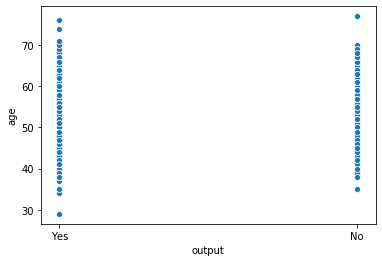

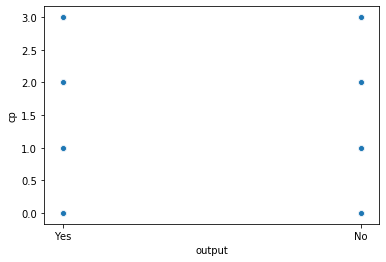

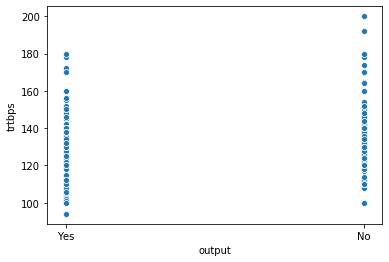

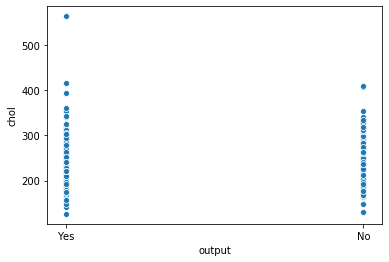

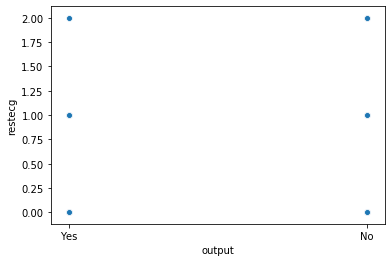

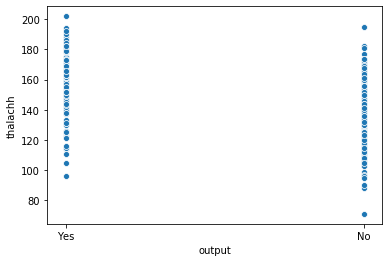

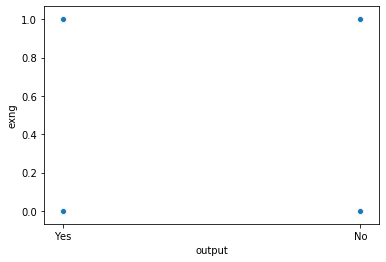

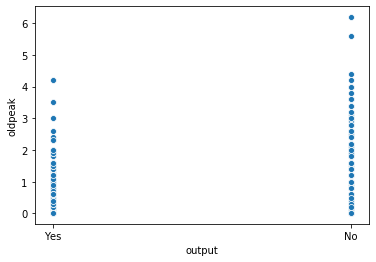

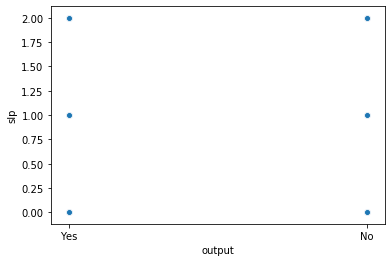

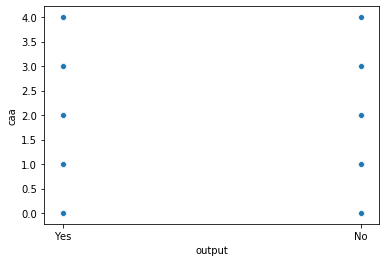

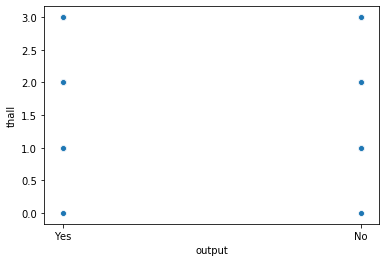

In [11]:
for i in df1_col:
    sns.scatterplot(x = df1['output'],y=df[i])
    plt.ylabel(i)
    plt.show()

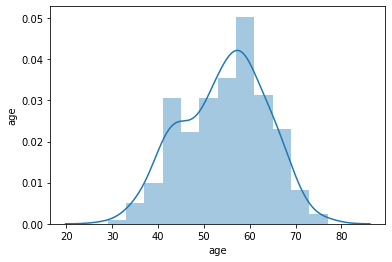

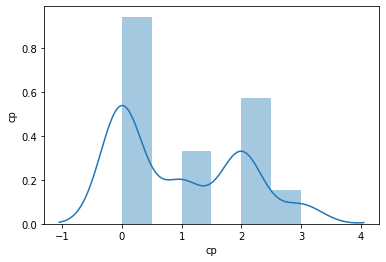

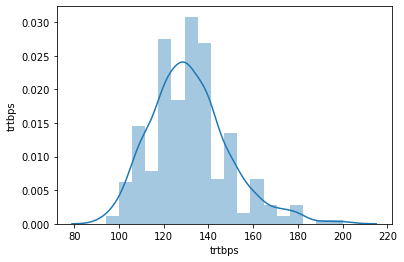

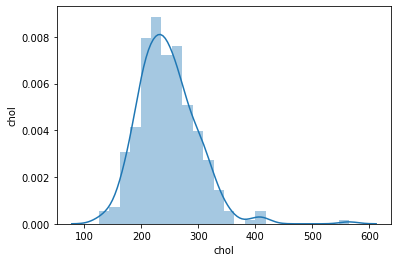

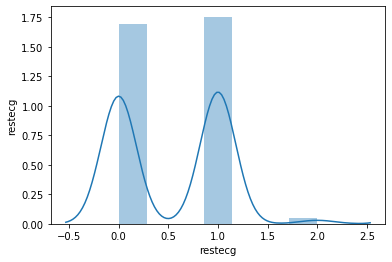

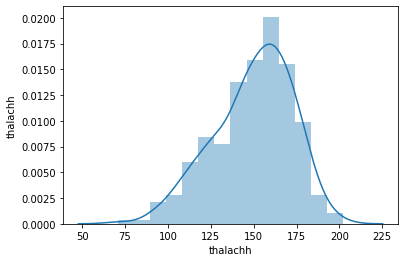

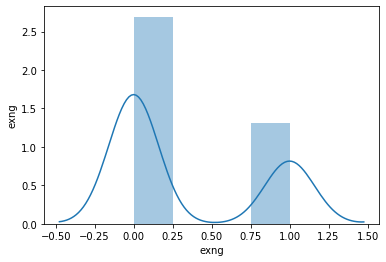

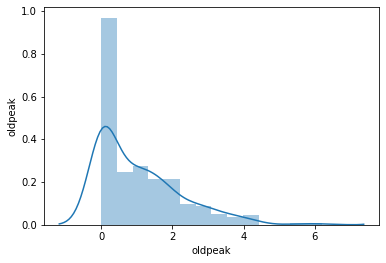

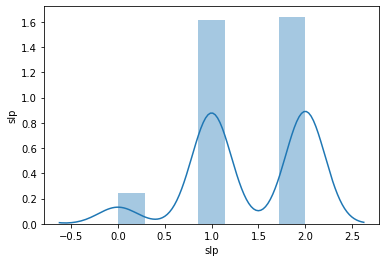

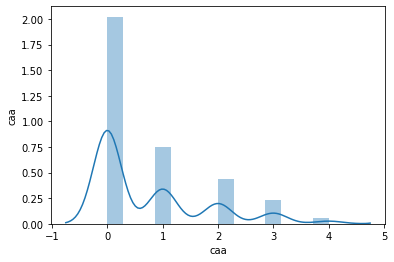

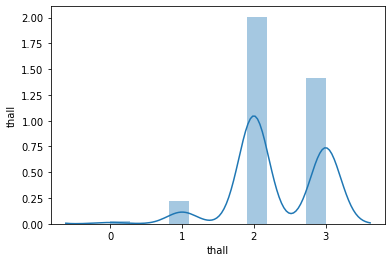

In [12]:
for i in df1_col:
    sns.distplot(df[i],kde=True)
    plt.ylabel(i)
    plt.show()

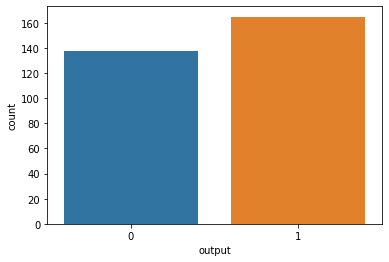

In [12]:
sns.countplot(df['output'])

In [13]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
kbest_model = SelectKBest(score_func =chi2, k=10)

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [15]:
x = df[df.columns[:-1]]
y = df['output']

In [16]:
kbest_model = SelectKBest(score_func =chi2, k=10)
kbest_model.fit(x,y)

SelectKBest(k=10, score_func=<function chi2 at 0x000002E9229D0678>)

In [17]:
kbest_model.scores_

array([ 23.28662399,   7.57683451,  62.59809791,  14.8239245 ,
        23.93639448,   0.20293368,   2.97827075, 188.32047169,
        38.91437697,  72.64425301,   9.8040952 ,  66.44076512,
         5.79185297])

In [18]:
dict1= {
    'Columns':x.columns,
    'Scores':kbest_model.scores_
}

In [19]:
feature_scores_df = pd.DataFrame(dict1)

In [20]:
feature_scores_df

,Columns,Scores
0,age,23.286624
1,sex,7.576835
2,cp,62.598098
3,trtbps,14.823925
4,chol,23.936394
5,fbs,0.202934
6,restecg,2.978271
7,thalachh,188.320472
8,exng,38.914377
9,oldpeak,72.644253


In [21]:
feature_scores_df.nlargest(10,'Scores')

,Columns,Scores
7,thalachh,188.320472
9,oldpeak,72.644253
11,caa,66.440765
2,cp,62.598098
8,exng,38.914377
4,chol,23.936394
0,age,23.286624
3,trtbps,14.823925
10,slp,9.804095
1,sex,7.576835


In [22]:
important_features = list(feature_scores_df.nlargest(10,'Scores')['Columns'])

In [23]:
df2_x = df[important_features]

In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [24]:
df2_x

,thalachh,oldpeak,caa,cp,exng,chol,age,trtbps,slp,sex
0,150,2.3,0,3,0,233,63,145,0,1
1,187,3.5,0,2,0,250,37,130,0,1
2,172,1.4,0,1,0,204,41,130,2,0
3,178,0.8,0,1,0,236,56,120,2,1
4,163,0.6,0,0,1,354,57,120,2,0
...,...,...,...,...,...,...,...,...,...,...
298,123,0.2,0,0,1,241,57,140,1,0
299,132,1.2,0,3,0,264,45,110,1,1
300,141,3.4,2,0,0,193,68,144,1,1
301,115,1.2,1,0,1,131,57,130,1,1


In [25]:
df2_x.describe()

,thalachh,oldpeak,caa,cp,exng,chol,age,trtbps,slp,sex
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,149.646865,1.039604,0.729373,0.966997,0.326733,246.264026,54.366337,131.623762,1.399340,0.683168
std,22.905161,1.161075,1.022606,1.032052,0.469794,51.830751,9.082101,17.538143,0.616226,0.466011
min,71.000000,0.000000,0.000000,0.000000,0.000000,126.000000,29.000000,94.000000,0.000000,0.000000
25%,133.500000,0.000000,0.000000,0.000000,0.000000,211.000000,47.500000,120.000000,1.000000,0.000000
50%,153.000000,0.800000,0.000000,1.000000,0.000000,240.000000,55.000000,130.000000,1.000000,1.000000
75%,166.000000,1.600000,1.000000,2.000000,1.000000,274.500000,61.000000,140.000000,2.000000,1.000000
max,202.000000,6.200000,4.000000,3.000000,1.000000,564.000000,77.000000,200.000000,2.000000,1.000000


In [26]:
len(list(df2_x.columns))

10

In [27]:
lqr_list = list()
limit = list()
for i in range(10):
    q1 = x[list(df2_x.columns)[i]].quantile(0.25)
    q3 = x[list(df2_x.columns)[i]].quantile(0.75)
    iqr = q3 - q1
    lqr_list.append(iqr)
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    limit.append([lower_limit,upper_limit])

In [28]:
lqr_list

[32.5, 1.6, 1.0, 2.0, 1.0, 63.5, 13.5, 20.0, 1.0, 1.0]

In [29]:
limit

[[84.75, 214.75],
 [-2.4000000000000004, 4.0],
 [-1.5, 2.5],
 [-3.0, 5.0],
 [-1.5, 2.5],
 [115.75, 369.75],
 [27.25, 81.25],
 [90.0, 170.0],
 [-0.5, 3.5],
 [-1.5, 2.5]]

In [30]:
df2_x.describe()

,thalachh,oldpeak,caa,cp,exng,chol,age,trtbps,slp,sex
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,149.646865,1.039604,0.729373,0.966997,0.326733,246.264026,54.366337,131.623762,1.399340,0.683168
std,22.905161,1.161075,1.022606,1.032052,0.469794,51.830751,9.082101,17.538143,0.616226,0.466011
min,71.000000,0.000000,0.000000,0.000000,0.000000,126.000000,29.000000,94.000000,0.000000,0.000000
25%,133.500000,0.000000,0.000000,0.000000,0.000000,211.000000,47.500000,120.000000,1.000000,0.000000
50%,153.000000,0.800000,0.000000,1.000000,0.000000,240.000000,55.000000,130.000000,1.000000,1.000000
75%,166.000000,1.600000,1.000000,2.000000,1.000000,274.500000,61.000000,140.000000,2.000000,1.000000
max,202.000000,6.200000,4.000000,3.000000,1.000000,564.000000,77.000000,200.000000,2.000000,1.000000


In [31]:
for i in list(df2_x.columns):
    print(df2_x[i].value_counts())

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalachh, Length: 91, dtype: int64
0.0    99
1.2    17
0.6    14
1.0    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.9     5
1.5     5
0.5     5
3.0     5
2.2     4
3.6     4
2.4     3
3.4     3
4.0     3
0.9     3
0.3     3
2.3     2
4.2     2
1.1     2
2.5     2
3.2     2
6.2     1
2.1     1
4.4     1
1.3     1
3.1     1
0.7     1
5.6     1
3.8     1
2.9     1
3.5     1
Name: oldpeak, dtype: int64
0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
0    204
1     99
Name: exng, dtype: int64
234    6
204    6
197    6
269    5
212    5
      ..
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63   

In [32]:
df2_x[df2_x['thalachh'] < 84.75]['thalachh'] = 84.75

C:\Users\abuba\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df2_x[df2_x['thalachh'] < 84.75]

,thalachh,oldpeak,caa,cp,exng,chol,age,trtbps,slp,sex
272,71,1.0,0,0,0,237,67,120,1,1


In [34]:
df2_x['thalachh'].replace(to_replace=71,value=84.75,inplace=True)

C:\Users\abuba\anaconda3\lib\site-packages\pandas\core\series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [35]:
df2_x[df2_x['thalachh'] < 84.75]

,thalachh,oldpeak,caa,cp,exng,chol,age,trtbps,slp,sex


In [36]:
df2_x[df2_x['oldpeak'] > 4]

,thalachh,oldpeak,caa,cp,exng,chol,age,trtbps,slp,sex
101,145.0,4.2,0,3,0,270,59,178,0,1
204,145.0,6.2,3,0,0,164,62,160,0,0
221,111.0,5.6,0,0,1,217,55,140,0,1
250,122.0,4.2,3,0,1,298,51,140,1,1
291,140.0,4.4,3,0,0,318,58,114,0,1


In [37]:

df2_x[df2_x['oldpeak'] > 4]['oldpeak'].apply(lambda x: df2_x['oldpeak'].median())

101    0.8
204    0.8
221    0.8
250    0.8
291    0.8
Name: oldpeak, dtype: float64

In [38]:
median = df2_x['oldpeak'].median()

In [39]:
df2_x['oldpeak'] = np.where(df2_x['oldpeak'] >4, median,df2_x['oldpeak'])

C:\Users\abuba\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df2_x[df2_x['oldpeak'] > 4]

,thalachh,oldpeak,caa,cp,exng,chol,age,trtbps,slp,sex


In [41]:
df2_x[df2_x['chol'] > 369.75]

,thalachh,oldpeak,caa,cp,exng,chol,age,trtbps,slp,sex
28,157.0,0.8,1,2,0,417,65,140,2,0
85,160.0,1.6,0,2,0,564,67,115,1,0
96,157.0,1.2,0,0,0,394,62,140,1,0
220,154.0,4.0,3,0,0,407,63,150,1,0
246,150.0,1.9,2,0,1,409,56,134,1,0


In [42]:
df2_x['chol'] = np.where(df2_x['chol'] > 369.75, median,df2_x['chol'])

C:\Users\abuba\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df2_x[df2_x['chol'] > 369.75]

,thalachh,oldpeak,caa,cp,exng,chol,age,trtbps,slp,sex


In [44]:
df2_x[df2_x['trtbps'] > 170]

,thalachh,oldpeak,caa,cp,exng,chol,age,trtbps,slp,sex
8,162.0,0.5,0,2,0,199.0,52,172,2,1
101,145.0,0.8,0,3,0,270.0,59,178,0,1
110,154.0,0.0,0,0,1,325.0,64,180,2,0
203,150.0,1.6,0,2,1,274.0,68,180,1,1
223,133.0,4.0,2,0,1,288.0,56,200,0,0
241,143.0,0.0,0,0,1,249.0,59,174,1,0
248,195.0,0.0,1,1,0,283.0,54,192,2,1
260,165.0,1.0,2,0,1,228.0,66,178,1,0
266,117.0,3.4,0,0,1,327.0,55,180,1,0


In [45]:
df2_x['trtbps'] = np.where(df2_x['trtbps'] > 170, median,df2_x['trtbps'])

C:\Users\abuba\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
df2_x[df2_x['trtbps'] > 170]

,thalachh,oldpeak,caa,cp,exng,chol,age,trtbps,slp,sex


In [47]:
df2_x.shape

(303, 10)

In [62]:
df3 = pd.merge(df2_x,y,how='outer',on=x.index)
df3.columns
df3

,key_0,thalachh,oldpeak,caa,cp,exng,chol,age,trtbps,slp,sex,output
0,0,150.0,2.3,0,3,0,233.0,63,145.0,0,1,1
1,1,187.0,3.5,0,2,0,250.0,37,130.0,0,1,1
2,2,172.0,1.4,0,1,0,204.0,41,130.0,2,0,1
3,3,178.0,0.8,0,1,0,236.0,56,120.0,2,1,1
4,4,163.0,0.6,0,0,1,354.0,57,120.0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,123.0,0.2,0,0,1,241.0,57,140.0,1,0,0
299,299,132.0,1.2,0,3,0,264.0,45,110.0,1,1,0
300,300,141.0,3.4,2,0,0,193.0,68,144.0,1,1,0
301,301,115.0,1.2,1,0,1,131.0,57,130.0,1,1,0


In [63]:
df3=df3.iloc[:,1:]
df3

,thalachh,oldpeak,caa,cp,exng,chol,age,trtbps,slp,sex,output
0,150.0,2.3,0,3,0,233.0,63,145.0,0,1,1
1,187.0,3.5,0,2,0,250.0,37,130.0,0,1,1
2,172.0,1.4,0,1,0,204.0,41,130.0,2,0,1
3,178.0,0.8,0,1,0,236.0,56,120.0,2,1,1
4,163.0,0.6,0,0,1,354.0,57,120.0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
298,123.0,0.2,0,0,1,241.0,57,140.0,1,0,0
299,132.0,1.2,0,3,0,264.0,45,110.0,1,1,0
300,141.0,3.4,2,0,0,193.0,68,144.0,1,1,0
301,115.0,1.2,1,0,1,131.0,57,130.0,1,1,0


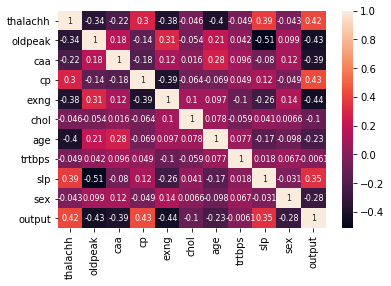

In [64]:
sns.heatmap(df3.corr(),annot=True,annot_kws={'size':8})

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df2_x,y,test_size = 0.2,random_state = 0)

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7540983606557377

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test,y_pred)

0.7868852459016393

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [73]:
params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : randint(5, 9),
    'max_features':randint(1, 9),
    'min_samples_leaf':randint(1, 9),
    'n_estimators':randint(100,250)
}
model = RandomForestClassifier()

random_search = RandomizedSearchCV(model,param_distributions = params,cv = 10)

In [74]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [75]:
random_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 2,
 'min_samples_leaf': 8,
 'n_estimators': 168}

In [76]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=168,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
random_search.best_score_

0.8390000000000001

In [78]:
best_random = random_search.best_estimator_
y_pred = best_random.predict(X_test)
accuracy_score(y_test,y_pred)

0.819672131147541

In [79]:
from sklearn.svm import SVC

In [80]:
for this_C in [1,3,5,10,20,25,30,40,60,80,100]:
    clf = SVC(kernel='linear',C=this_C).fit(X_train,y_train)
    scoretrain = clf.score(X_train,y_train)
    scoretest  = clf.score(X_test,y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.855372 , Test Score: 0.803279 

Linear SVM value of C:3, training score :0.847107 , Test Score: 0.786885 

Linear SVM value of C:5, training score :0.847107 , Test Score: 0.786885 

Linear SVM value of C:10, training score :0.851240 , Test Score: 0.803279 

Linear SVM value of C:20, training score :0.842975 , Test Score: 0.803279 

Linear SVM value of C:25, training score :0.838843 , Test Score: 0.803279 

Linear SVM value of C:30, training score :0.834711 , Test Score: 0.803279 

Linear SVM value of C:40, training score :0.834711 , Test Score: 0.803279 

Linear SVM value of C:60, training score :0.834711 , Test Score: 0.819672 

Linear SVM value of C:80, training score :0.834711 , Test Score: 0.803279 

Linear SVM value of C:100, training score :0.842975 , Test Score: 0.803279 



In [81]:
for i in ['linear','rbf','poly','sigmoid']:
    clf = SVC(kernel=i,C=60).fit(X_train,y_train)
    scoretrain = clf.score(X_train,y_train)
    scoretest  = clf.score(X_test,y_test)
    print("SVM value of kernal:{}, training score :{:2f} , Test Score: {:2f} \n".format(i,scoretrain,scoretest))

SVM value of kernal:linear, training score :0.834711 , Test Score: 0.819672 

SVM value of kernal:rbf, training score :0.743802 , Test Score: 0.737705 

SVM value of kernal:poly, training score :0.780992 , Test Score: 0.754098 

SVM value of kernal:sigmoid, training score :0.578512 , Test Score: 0.524590 



In [83]:
clf = SVC(kernel='linear',C=60).fit(X_train,y_train)
scoretrain = clf.score(X_train,y_train)
scoretest  = clf.score(X_test,y_test)
scoretest 

0.819672131147541

In [84]:
import pickle
with open('Heart_disease.pickle','wb') as f:
    pickle.dump(clf,f)

In [85]:
import json
columns = {
    'data_columns' : [col.lower() for col in df2_x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))